In [56]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from typing import List, Tuple, Union
from dataclasses import dataclass
from scipy.spatial import distance

In [57]:
rad_measure = pd.read_csv("../data/GT/result_5points.csv")
correct_list = []
correct_list.append([1.5,1.5,50.0])
correct_list.append([8.5,1.5,80.0])
correct_list.append([1.5,8.5,30.0])
correct_list.append([8.5,8.5,70.0])
correct_list.append([4.5,4.5,90.0])
print(correct_list)
x = rad_measure['x']
y = rad_measure['y']
attenuation = 0.10177304964539008

[[1.5, 1.5, 50.0], [8.5, 1.5, 80.0], [1.5, 8.5, 30.0], [8.5, 8.5, 70.0], [4.5, 4.5, 90.0]]


In [58]:
def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [59]:
def calculate_nearest_i(g, correct_list):
    nearest_i = []
    G = g*g
    d=10/g
    for l in correct_list:
        temp_i = []
        temp_i.append((0,100000))
        for i in range(G):
            temp_x = (i % g)*d + d/2
            temp_y = (i//g)*d + d/2
            temp_dis = calculate_distance(l[0],l[1],temp_x,temp_y)
            if temp_dis < temp_i[0][1]:
                temp_i.clear()
                temp_i.append((i, temp_dis))
            elif temp_dis == temp_i[0][1]:
                temp_i.append((i, temp_dis))
            else:
                pass

        nearest_i.append(temp_i)

    return nearest_i

In [60]:
def calculate_L1(t,q):
    sum = 0
    for i in range(len(q)):
        sum += (t[i]-q[i])

    return sum

In [61]:
rad =[]
for i in range(len(rad_measure)):
    temp_rad = 0
    s_pos = rad_measure['shield'][i]
    for l in correct_list:
        dis = calculate_distance(x[i],y[i],l[0],l[1])
        if s_pos == 'A':
            if x[i] < l[0] and y[i] < l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'B':
            if x[i] < l[0] and y[i] > l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'C':
            if x[i] > l[0] and y[i] > l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'D':
            if x[i] > l[0] and y[i] < l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)

    rad.append(temp_rad)

In [62]:
rad_ns =[]
x_ns =[]
y_ns =[]
for i in range(len(rad_measure)):
    if i % 4 == 0:
        x_ns.append(rad_measure['x'][i])
        y_ns.append(rad_measure['y'][i])
        temp_rad = 0
        s_pos = rad_measure['shield'][i]
        for l in correct_list:
            dis = calculate_distance(x[i],y[i],l[0],l[1])
            temp_rad += l[2] / (dis**2)

        rad_ns.append(temp_rad)

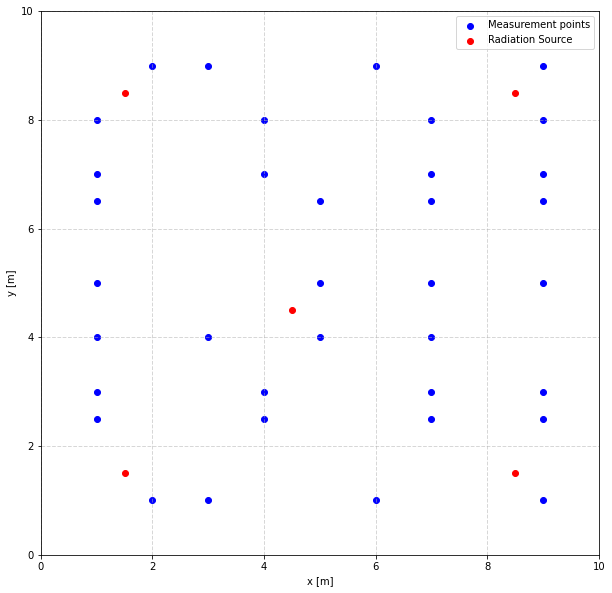

In [63]:
plt.figure(figsize=(10, 10))

plt.scatter(x_ns, y_ns,color='blue',label='Measurement points')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.xlim(0,10)
plt.ylim(0,10)
i = 0
for l in correct_list:
    if i == 0:
        plt.scatter(l[0],l[1], color='red', label='Radiation Source')
    else:
        plt.scatter(l[0],l[1], color='red')
    i += 1

plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.legend()
plt.show()

# MLE

In [64]:
#計測値
b = np.array(rad)
#grid 20*20
g = 40
d = 10/g
G = g*g
q_max = 100
q_init = 1/q_max
q = np.array([q_init]*G)
q = q.astype(float)

[[(205, 0.1767766952966369), (206, 0.1767766952966369), (245, 0.1767766952966369), (246, 0.1767766952966369)], [(233, 0.1767766952966369), (234, 0.1767766952966369), (273, 0.1767766952966369), (274, 0.1767766952966369)], [(1325, 0.1767766952966369), (1326, 0.1767766952966369), (1365, 0.1767766952966369), (1366, 0.1767766952966369)], [(1353, 0.1767766952966369), (1354, 0.1767766952966369), (1393, 0.1767766952966369), (1394, 0.1767766952966369)], [(697, 0.1767766952966369), (698, 0.1767766952966369), (737, 0.1767766952966369), (738, 0.1767766952966369)]]


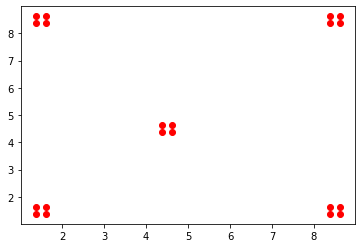

In [65]:
near_i = calculate_nearest_i(g, correct_list)
print(near_i)
for l in near_i:
    for ll in l:
        i = ll[0]
        temp_x = (i % g)*d + d/2
        temp_y = (i//g)*d + d/2
        plt.scatter(temp_x,temp_y, color='red', label='Red Point')

In [66]:
A = np.zeros((144, G))

for i in range(len(b)):
    m_x = rad_measure['x'][i]
    m_y = rad_measure['y'][i]
    s_pos = rad_measure['shield'][i]
    for j in range(G):
        d = 10 / g
        G_x = (j % g)*d + d/2
        G_y = (j//g)*d + d/2
        dis = calculate_distance(m_x, m_y, G_x, G_y)
        A[i][j] = 1/(dis**2)
        if s_pos == 'A':
            if m_x < G_x and m_y < G_y:
                A[i][j] *= attenuation
                
        elif s_pos == 'B':
            if m_x < G_x and m_y > G_y:
                A[i][j] *= attenuation
        elif s_pos == 'C':
            if m_x > G_x and m_y > G_y:
                A[i][j] *= attenuation
        elif s_pos == 'D':
            if m_x > G_x and m_y < G_y:
                A[i][j] *= attenuation

In [67]:
def score_func(A,b,q):
    b_ave = A.dot(q)
    score = np.sum(b*np.log(b_ave))-np.sum(b_ave)
    return score

def grad_func(A,b,q):
    b_ave = A.dot(q)
    grad_tmp = (b/b_ave)[:,np.newaxis]*A
    grad = grad_tmp.sum(axis=0) - A.sum(axis=0)
    return grad

In [68]:
def Adam(A, b, q, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
    m = np.zeros_like(q)
    v = np.zeros_like(q)
    
    for i in range(max_iter):
        t = i + 1
        gradient = grad_func(A, b, q)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        
        q += learning_rate * m_hat / (np.sqrt(v_hat + epsilon))

        # bound > 0
        q[q<0]=0.0000001
        score = score_func(A,b,q)

        if i%10000==0:
            plt.figure()
            #plt.title(f'iter:{i} score:{score:.5} q_max:{q.max():.3}, q_min:{q.min():.3}')
            plt.imshow(q.reshape(g,g),origin='lower',cmap='Greys')
            plt.colorbar()
            d = 10 / g
            max_q_i = np.argmax(q)
            max_x = (max_q_i % g)*d + d/2
            max_y = (max_q_i//g)*d + d/2
            print(max_q_i,max_x, max_y)
    
    return q

In [69]:
init_score = score_func(A,b,q)
print(f'initial score:{init_score}')

initial score:6086.88993977425


1435 8.875 8.875
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
656 4.125 4.125
195 8.875 1.125
195 8.875 1.125
195 8.875 1.125
195 8.875 1.125
195 8.875 1.125
195 8.875 1.125
195 8.875 1.125
195 8.875 1.125


array([1.e-07, 1.e-07, 1.e-07, ..., 1.e-07, 1.e-07, 1.e-07])

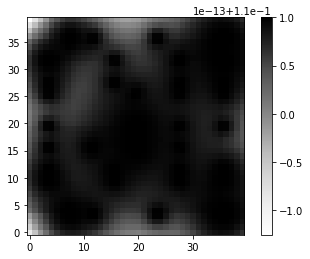

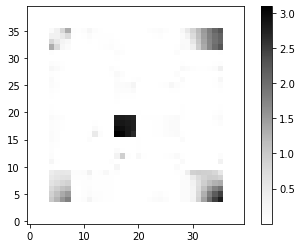

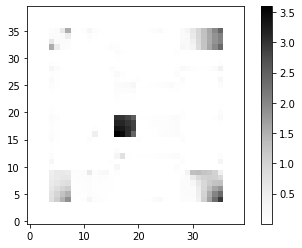

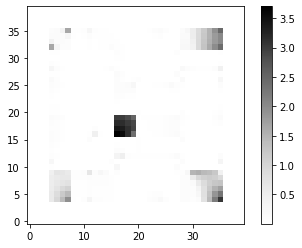

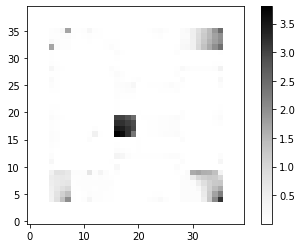

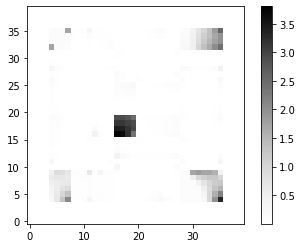

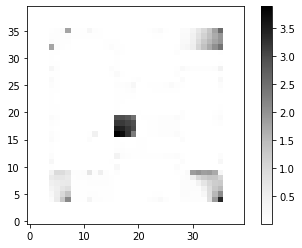

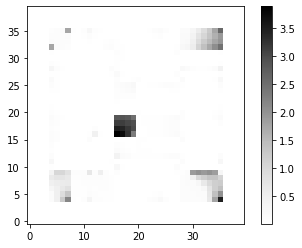

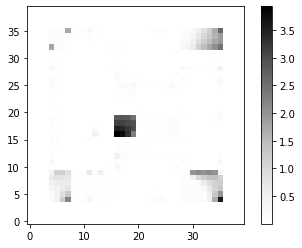

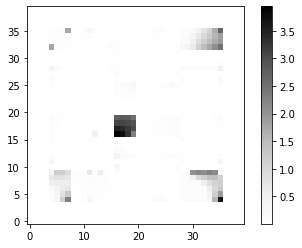

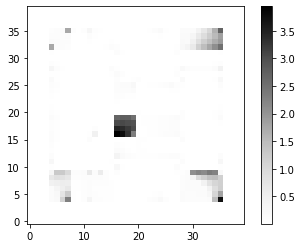

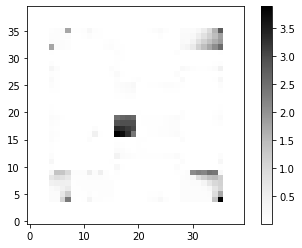

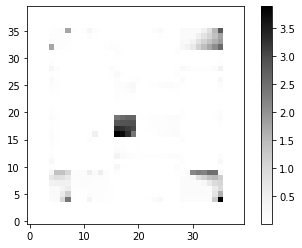

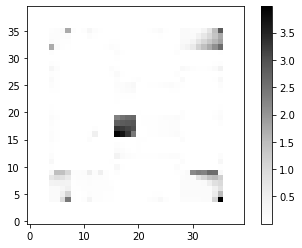

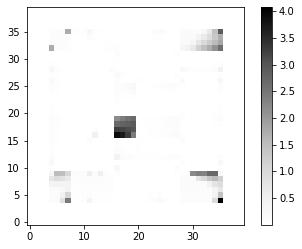

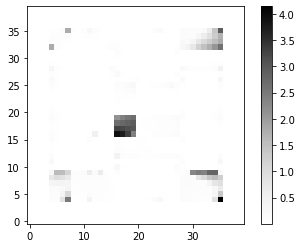

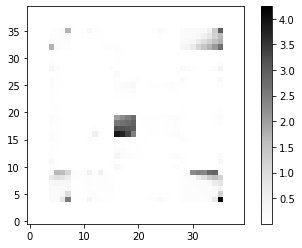

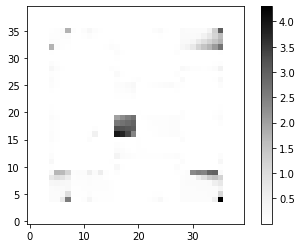

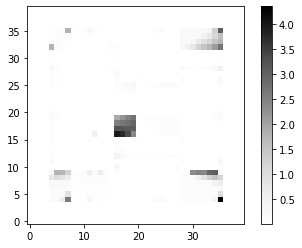

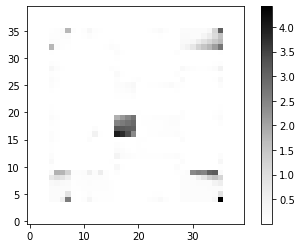

In [70]:
Adam(A, b, q, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=200000)

Text(0, 0.5, 'y [m]')

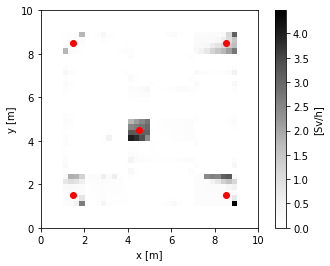

In [71]:
# Reshape q to a 2D grid
q_grid = q.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(q_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red', label='Red Point')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')

Text(0, 0.5, 'y [m]')

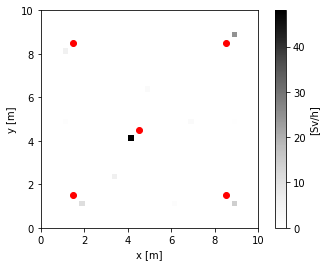

In [72]:
q_grid_new = np.zeros((50, 50))

q_grid_new[5:45,5:45] = q_grid
q_grid_copy = q_grid_new.copy()

for i in range(5,45):
    for j in range(5,45):
        sub_grid = q_grid_new[i-5:i+5,j-5:j+5]
        max_index = np.unravel_index(np.argmax(sub_grid), sub_grid.shape)
        if q_grid_new[i][j] == sub_grid[max_index[0]][max_index[1]]:
            q_grid_new[i][j] += np.sum(sub_grid)

for i in range(50):
    for j in range(50):
        q_grid_new[i][j] -= q_grid_copy[i][j]

restored_grid = q_grid_new[5:45, 5:45]

        # Plot the heatmap using imshow with extent specified
plt.imshow(restored_grid, origin='lower', cmap='Greys',extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale


for l in correct_list:
    plt.scatter(l[0],l[1], color='red', label='Red Point')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')

In [86]:

# 2次元リストをNumPy配列に変換
matrix_array = np.array(restored_grid)

# 大きい順に3つの要素の値とインデックスを取得
top5_indices = np.argpartition(matrix_array.flatten(), -6)[-6:]
top5_values = matrix_array.flatten()[top5_indices]

# 大きい順に3つの要素の値とインデックス（(x, y)形式）を表示
for index, value in zip(top5_indices, top5_values):
    x, y = np.unravel_index(index, matrix_array.shape)
    print(f"要素の値: {value}, インデックス: ({x}, {y})")
    G_x = d/2 + d*y
    G_y = d/2 + d*x
    print(G_x,G_y)

要素の値: 5.4670138053513195, インデックス: (32, 4)
1.125 8.125
要素の値: 5.631036070319674, インデックス: (9, 13)
3.375 2.375
要素の値: 10.649799137142493, インデックス: (4, 7)
1.875 1.125
要素の値: 47.984085477380745, インデックス: (16, 16)
4.125 4.125
要素の値: 24.66883801479682, インデックス: (35, 35)
8.875 8.875
要素の値: 13.920947625588504, インデックス: (4, 35)
8.875 1.125


In [74]:
sum(q)

139.5414519295313

# Minamoto

In [75]:
A_ns = np.zeros((36, G))

for i in range(len(rad_ns)):
    m_x = x_ns[i]
    m_y = y_ns[i]
    for j in range(G):
        d = 10 / g
        G_x = (j % g)*d + d/2
        G_y = (j//g)*d + d/2
        dis = calculate_distance(m_x, m_y, G_x, G_y)
        A_ns[i][j] = 1/(dis**2)

In [76]:
v_ns = np.array(rad_ns)
q_ns = np.array([q_init]*G)
q_ns = q_ns.astype(float)

In [77]:
init_score = score_func(A,b,q)
print(f'initial score:{init_score}')

initial score:18880.18544117902


156 9.125 0.875
779 4.875 4.875
779 4.875 4.875
779 4.875 4.875
779 4.875 4.875
779 4.875 4.875
779 4.875 4.875
780 5.125 4.875
780 5.125 4.875
780 5.125 4.875


array([0.01228496, 0.01876005, 0.02730119, ..., 0.01830847, 0.0160657 ,
       0.01342559])

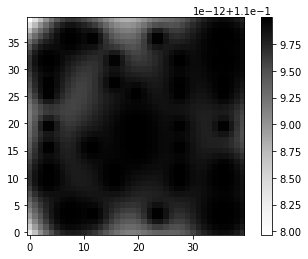

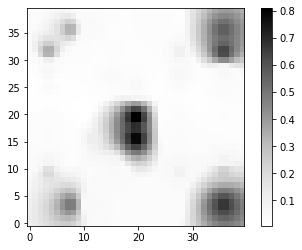

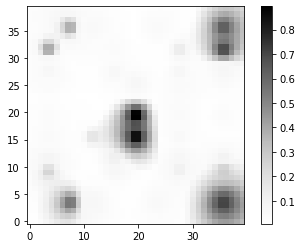

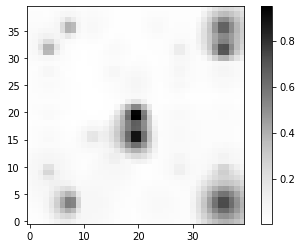

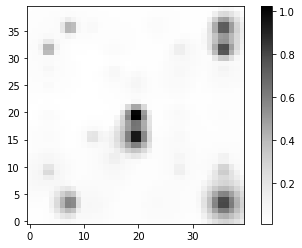

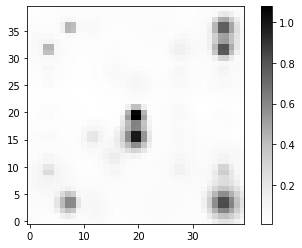

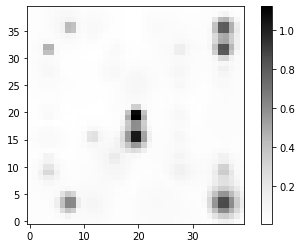

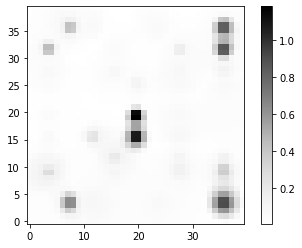

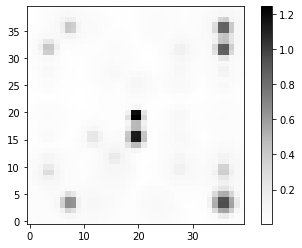

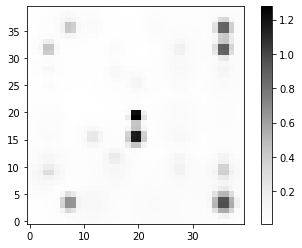

In [78]:
Adam(A_ns, v_ns, q_ns, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=100000)

Text(0, 0.5, 'y [m]')

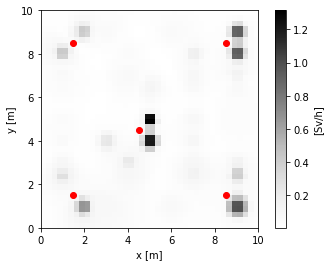

In [79]:
# Reshape q to a 2D grid
q_ns_grid = q_ns.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(q_ns_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red', label='Red Point')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')

In [80]:
print(sum(q_ns))

110.53651695339609


# L1

In [81]:
t = np.array([0]*G)
near_i = calculate_nearest_i(g, correct_list)
print(near_i)
for j in range(len(correct_list)):
    l = near_i[j]
    print(l)
    z = len(l)
    t_prime = correct_list[j][2] / z
    for i in l:#それぞれの放射線源の最近傍点
        t[i[0]] = t_prime

nearest_x = (287 % g)*d + d/2
nearest_y = (287//g)*d + d/2
print(nearest_x,nearest_y)

[[(205, 0.1767766952966369), (206, 0.1767766952966369), (245, 0.1767766952966369), (246, 0.1767766952966369)], [(233, 0.1767766952966369), (234, 0.1767766952966369), (273, 0.1767766952966369), (274, 0.1767766952966369)], [(1325, 0.1767766952966369), (1326, 0.1767766952966369), (1365, 0.1767766952966369), (1366, 0.1767766952966369)], [(1353, 0.1767766952966369), (1354, 0.1767766952966369), (1393, 0.1767766952966369), (1394, 0.1767766952966369)], [(697, 0.1767766952966369), (698, 0.1767766952966369), (737, 0.1767766952966369), (738, 0.1767766952966369)]]
[(205, 0.1767766952966369), (206, 0.1767766952966369), (245, 0.1767766952966369), (246, 0.1767766952966369)]
[(233, 0.1767766952966369), (234, 0.1767766952966369), (273, 0.1767766952966369), (274, 0.1767766952966369)]
[(1325, 0.1767766952966369), (1326, 0.1767766952966369), (1365, 0.1767766952966369), (1366, 0.1767766952966369)]
[(1353, 0.1767766952966369), (1354, 0.1767766952966369), (1393, 0.1767766952966369), (1394, 0.1767766952966369

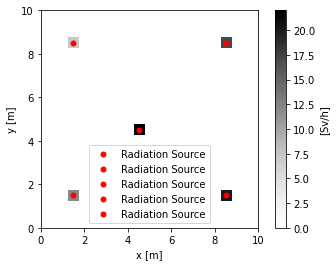

In [82]:
# Reshape q to a 2D grid
t_grid = t.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(t_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red', s=25,label='Radiation Source')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

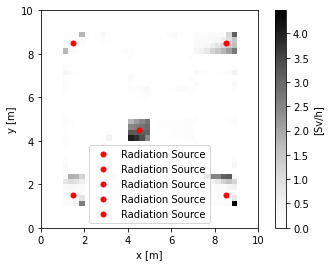

In [83]:
# Reshape q to a 2D grid
q_grid = q.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(q_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red',s=25,label='Radiation Source')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

In [84]:
proposed_l1 = calculate_L1(t,q)
print(proposed_l1)

172.4585480704704


In [85]:
minamoto_l1 = calculate_L1(t,q_ns)
print(minamoto_l1)

201.46348304660324
